# Pymaceuticals Inc.
---

### Analysis

- The drug regimens that reduces tumor size the best are Capomulin and Ramicane. This is seen by the drastic drop in the average and middle point of tumor volume compared to the other two drug regimens.

- An interesting note to be considered for choosing which drug regimen to use, one should look at the weight of the subject and the size of the tumor. We should look at these figures because there is a correlation between weight and tumor size. Therefore, the higher the weight, the higher the tumor volume and we can use one of the effective drug regimens to reduce the tumor volume.

- The gender population for the mice was nearly evenly split with 125 males and 124 females. This will give us a better understanding of how each gender reacts to each drug.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data = pd.merge(mouse_metadata, study_results, how='right')

# Display the data table for preview
study_data = study_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
                         'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mouse_count = len(study_data['Mouse ID'].unique())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data.loc[study_data.duplicated(['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice = study_data.loc[study_data['Mouse ID'] == 'g989', :]
dup_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = study_data[study_data['Mouse ID'].isin(duplicate_mice)==False]
clean_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_study_data['Mouse ID'].unique())
clean_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_mean = clean_study_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
drug_median = clean_study_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drug_var = clean_study_data.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
drug_standdev = clean_study_data.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
drug_sem = clean_study_data.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

drug_table = pd.DataFrame({"Mean Tumor Volume": drug_mean,
                           "Median Tumor Volume": drug_median,
                           "Tumor Volume Variance": drug_var,
                           "Tumor Volume Std. Dev.": drug_standdev,
                           "Tumor Volume Std. Err.": drug_sem})
drug_table

C:\Users\jordo\AppData\Local\Temp\ipykernel_10064\3989231341.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drug_mean = clean_study_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
C:\Users\jordo\AppData\Local\Temp\ipykernel_10064\3989231341.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drug_median = clean_study_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
C:\Users\jordo\AppData\Local\Temp\ipykernel_10064\3989231341.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_agg = clean_study_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

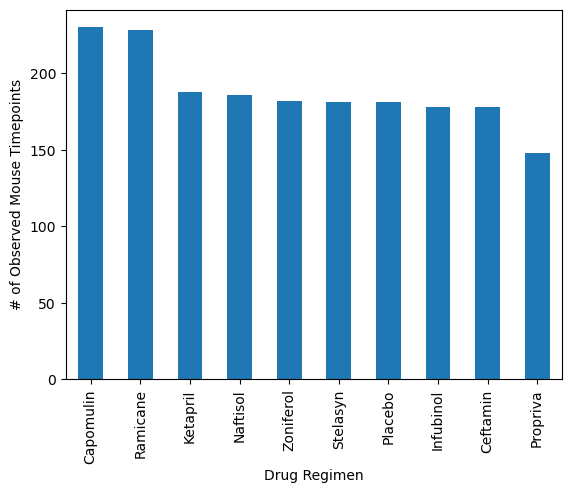

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_study_data["Drug Regimen"].value_counts()

regimen_pandas = mice_count.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

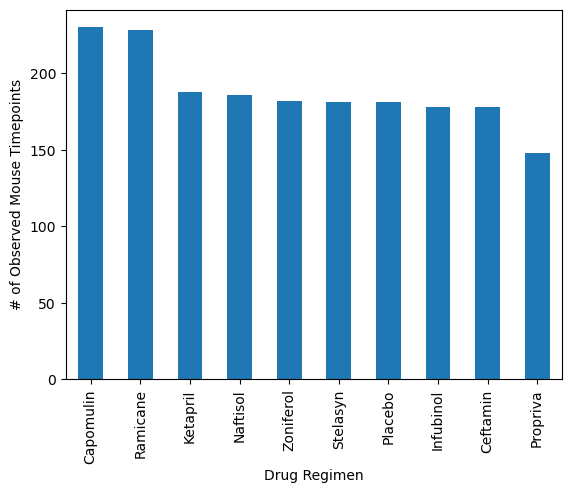

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mice_drug = clean_study_data["Drug Regimen"].value_counts()

regimen_pyplot = mice_drug.plot(kind="bar",
                               xlabel="Drug Regimen",
                               ylabel="# of Observed Mouse Timepoints")

plt.show()

<Axes: ylabel='Sex'>

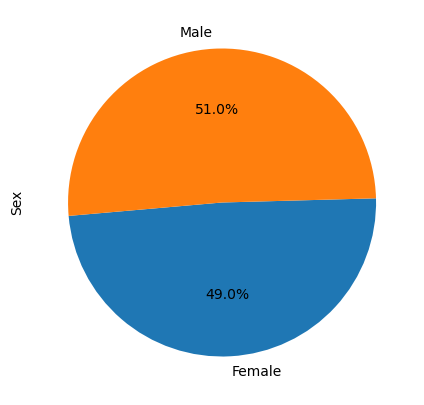

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_group = clean_study_data.groupby(['Sex'])['Sex'].count()
gender_group.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(5,5))


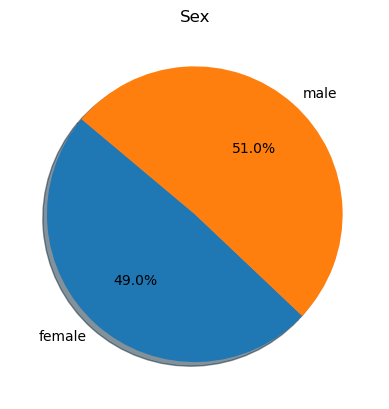

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_group, labels=('female', 'male'), 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_study_data.groupby(["Mouse ID"])["Timepoint"].max()
greatest_timepoint = greatest_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_timepoint = greatest_timepoint.merge(clean_study_data, on=["Mouse ID", "Timepoint"], how='left')
merged_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
total_tumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_timepoint.loc[merged_timepoint["Drug Regimen"] ==treatment, "Tumor Volume (mm3)"]
    
    # add subset 
    total_tumor.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"For {treatment}, the outliers are: {outliers}")

For Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


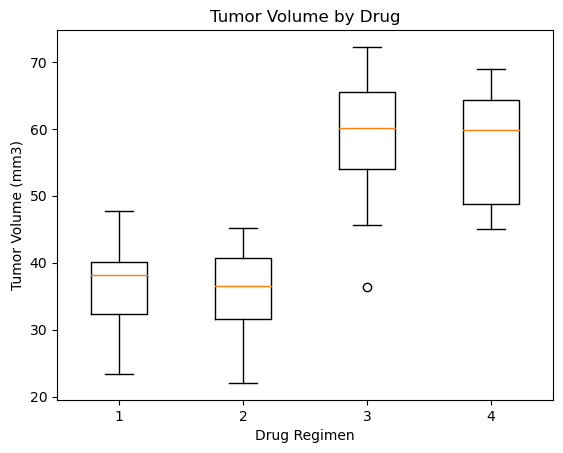

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(total_tumor)

plt.show()

## Line and Scatter Plots

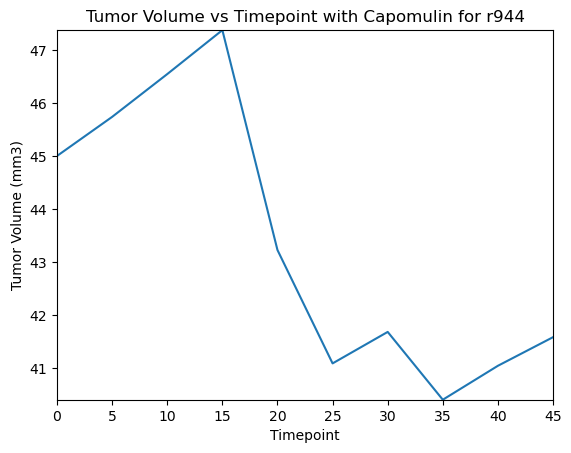

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_mouse = clean_study_data[clean_study_data['Drug Regimen']=='Capomulin']
mouse_pick = cap_mouse.loc[cap_mouse['Mouse ID'] == 'r944']
timepoints = [0,5,10,15,20,25,30,35,40,45]
plt.title('Tumor Volume vs Timepoint with Capomulin for r944')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.xlim(0,45)
plt.ylim(mouse_pick['Tumor Volume (mm3)'].min(),mouse_pick['Tumor Volume (mm3)'].max())
plt.plot(mouse_pick['Timepoint'],mouse_pick['Tumor Volume (mm3)'])

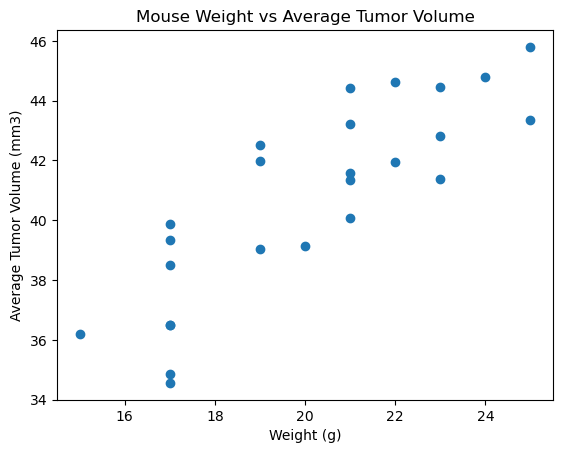

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_weight = cap_mouse.groupby(['Mouse ID'])['Weight (g)'].value_counts()
cap_average = cap_mouse.groupby(['Mouse ID'])[['Weight (g)','Tumor Volume (mm3)']].mean()

plt.scatter(cap_average['Weight (g)'], cap_average['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


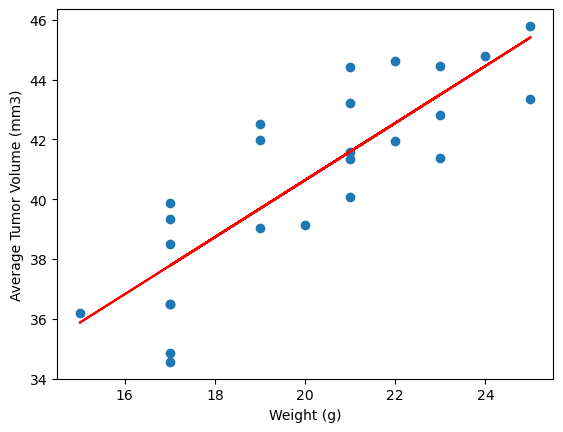

In [33]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(cap_average['Weight (g)'],cap_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(cap_average['Weight (g)'],cap_average['Tumor Volume (mm3)'])

y_values = cap_average['Weight (g)']*model[0]+model[1]
plt.scatter(cap_average['Weight (g)'],cap_average['Tumor Volume (mm3)'])
plt.plot(cap_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()